In [ ]:
# PRIMA COSA, INSTALLARE PYSPARK
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=c90ab208d732d1cd98a7c31cd14a483c06c69e845cc2adac6a8073ea6b2abf91
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
!pip install pandas.plotting

ERROR: Could not find a version that satisfies the requirement pandas.plotting (from versions: none)
ERROR: No matching distribution found for pandas.plotting


In [ ]:
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, when
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.Builder().appName("Project_DDAM_parquet").getOrCreate()

In [ ]:
sqlCtx= SQLContext(spark)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=spark.read.format("parquet").option("header", True).option("inferSchema", True).load("/content/drive/MyDrive/DDAM project/file_row_dropped/content/output.parquet")

In [ ]:
df.select(df.columns[:5]).show()

+-------------------+--------------------+------+----+---------+
|         FlightDate|             Airline|Origin|Dest|Cancelled|
+-------------------+--------------------+------+----+---------+
|2018-01-18 00:00:00|United Air Lines ...|   ORD| LAX|    false|
|2018-03-18 00:00:00|United Air Lines ...|   LAX| HNL|    false|
|2018-04-22 00:00:00|     JetBlue Airways|   JFK| FLL|    false|
|2018-10-10 00:00:00|American Airlines...|   DFW| ORD|    false|
|2018-05-17 00:00:00|       Allegiant Air|   BLV| PGD|    false|
|2018-11-27 00:00:00|SkyWest Airlines ...|   ORD| LGA|    false|
|2018-04-16 00:00:00|United Air Lines ...|   IAD| PHX|    false|
|2018-10-10 00:00:00|United Air Lines ...|   SFO| ORD|    false|
|2018-07-18 00:00:00|SkyWest Airlines ...|   SMF| SAN|    false|
|2018-06-26 00:00:00|     JetBlue Airways|   LAX| JFK|    false|
|2018-02-15 00:00:00|    Spirit Air Lines|   MSP| ATL|    false|
|2018-04-19 00:00:00|Southwest Airline...|   TUS| LAX|    false|
|2018-09-01 00:00:00|SkyW

In [ ]:
num_columns = len(df.columns)
print(num_columns)

45


In [ ]:
for name in df.columns:
    print(name)

FlightDate
Airline
Origin
Dest
Cancelled
Diverted
DepDelay
AirTime
Distance
Month
DayofMonth
DayOfWeek
Marketing_Airline_Network
Operated_or_Branded_Code_Share_Partners
Flight_Number_Marketing_Airline
Operating_Airline
Tail_Number
Flight_Number_Operating_Airline
OriginAirportID
OriginCityName
OriginStateName
DestAirportID
DestCityName
DestStateName
DepDel15
DepartureDelayGroups
DepTimeBlk
ArrDelay
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
DistanceGroup
DivAirportLandings
DepTime
ArrTime
WheelsOff
WheelsOn
scaled_DepDelay
scaled_AirTime
scaled_Distance
scaled_ArrDelay
scaled_DepTime_InMinutes
scaled_ArrTime_InMinutes
scaled_WheelsOff_InMinutes
scaled_WheelsOn_InMinutes


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
variable_of_interest = 'DepDelay'

# Calcola la distribuzione della variabile
distribution = df.groupBy(variable_of_interest).count()

# Mostra il risultato
distribution.show()

+--------+-----+
|DepDelay|count|
+--------+-----+
|   299.0|  151|
|   305.0|  144|
|   558.0|   16|
|   596.0|    9|
|   496.0|   16|
|   934.0|   10|
|   692.0|    7|
|   147.0| 1282|
|   170.0|  922|
|   184.0|  754|
|   720.0|    7|
|   576.0|   16|
|   810.0|   14|
|   782.0|    4|
|   160.0| 1075|
|   169.0|  921|
|   735.0|   13|
|   608.0|    9|
|     8.0|55315|
|    70.0| 5207|
+--------+-----+
only showing top 20 rows



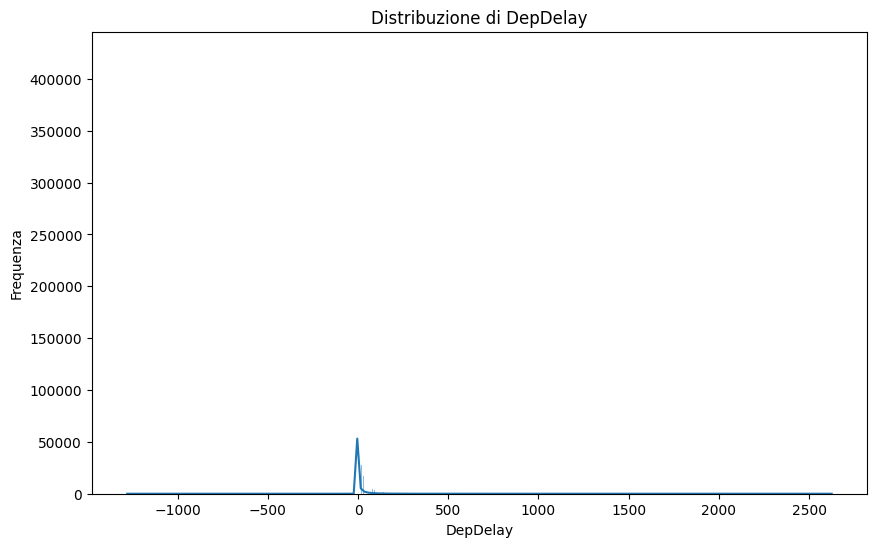

In [ ]:
# Distirbuzione del ritardo

variable_of_interest = 'DepDelay'

# Converte il DataFrame PySpark in un Pandas DataFrame
pandas_df = df.select(variable_of_interest).toPandas()

# Utilizza Seaborn per visualizzare la distribuzione
plt.figure(figsize=(10, 6))
sns.histplot(pandas_df[variable_of_interest], kde=True)
plt.title(f'Distribuzione di {variable_of_interest}')
plt.xlabel(variable_of_interest)
plt.ylabel('Frequenza')
plt.show()

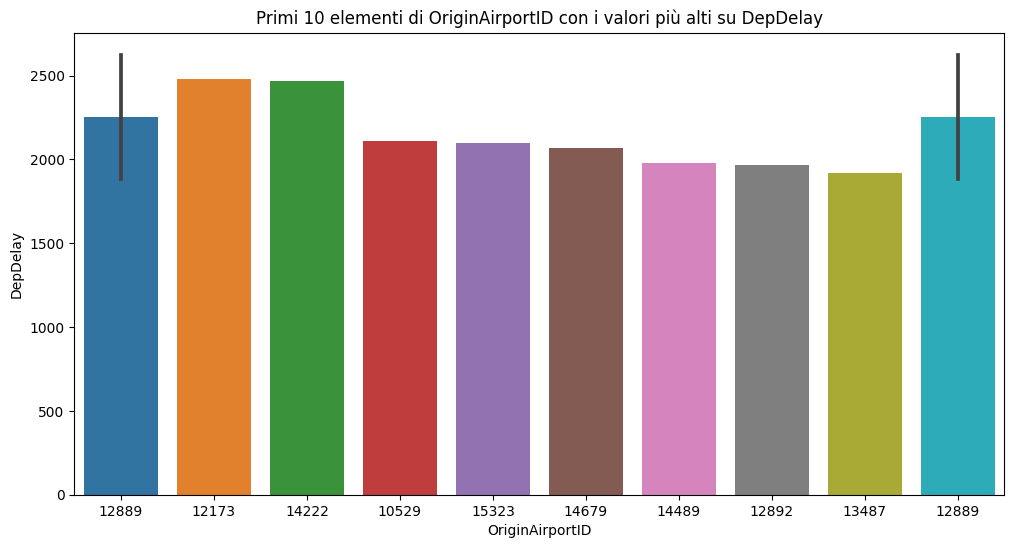

In [ ]:
categorical_variable = 'OriginAirportID'
numeric_variable = 'DepDelay'

# Ordina il DataFrame in base alla variabile numerica in ordine decrescente
sorted_df = df.orderBy(col(numeric_variable).desc())

# Seleziona i primi dieci elementi
top_10_df = sorted_df.limit(10).toPandas()

# Utilizza Seaborn per visualizzare il grafico
plt.figure(figsize=(12, 6))
sns.barplot(x=categorical_variable, y=numeric_variable, data=top_10_df, order=top_10_df[categorical_variable])
plt.title(f'Primi 10 elementi di {categorical_variable} con i valori più alti su {numeric_variable}')
plt.xlabel(categorical_variable)
plt.ylabel(numeric_variable)
plt.show()

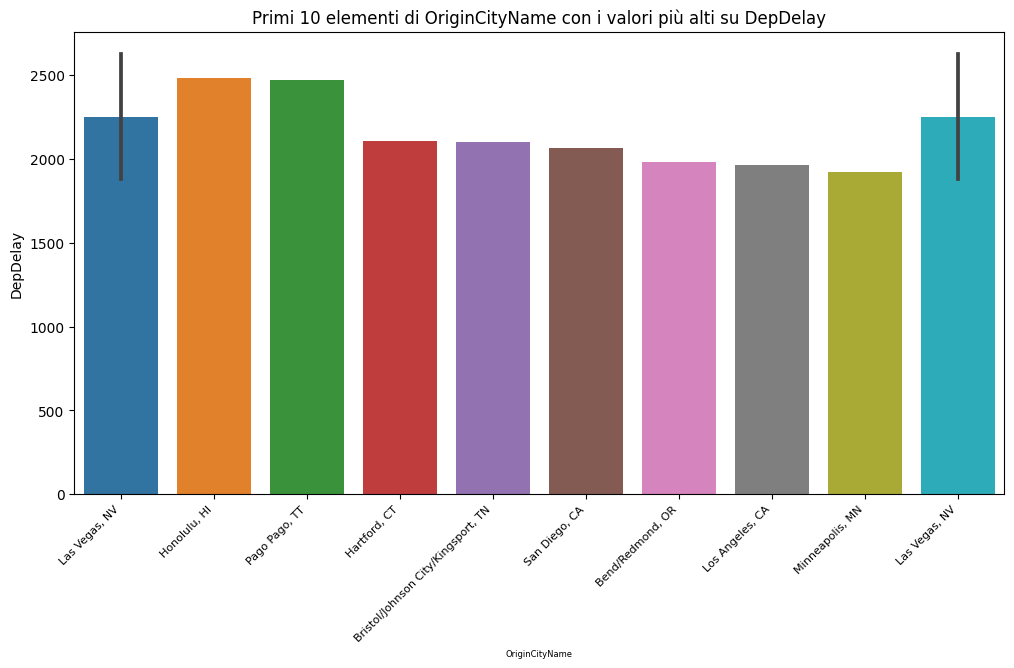

In [ ]:
categorical_variable = 'OriginCityName'
numeric_variable = 'DepDelay'

# Ordina il DataFrame in base alla variabile numerica in ordine decrescente
sorted_df = df.orderBy(col(numeric_variable).desc())

# Seleziona i primi dieci elementi
top_10_df = sorted_df.limit(10).toPandas()

# Utilizza Seaborn per visualizzare il grafico
plt.figure(figsize=(12, 6))
sns.barplot(x=categorical_variable, y=numeric_variable, data=top_10_df, order=top_10_df[categorical_variable])
plt.title(f'Primi 10 elementi di {categorical_variable} con i valori più alti su {numeric_variable}')
plt.xlabel(categorical_variable, size=6)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.ylabel(numeric_variable)
plt.show()

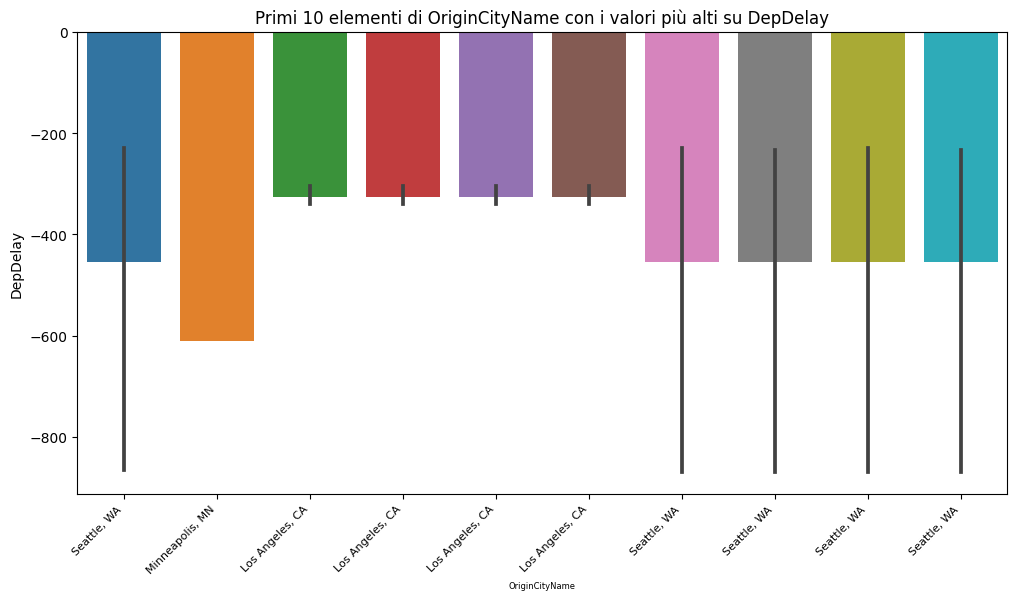

In [ ]:
categorical_variable = 'OriginCityName'
numeric_variable = 'DepDelay'

# Ordina il DataFrame in base alla variabile numerica in ordine decrescente
sorted_df = df.orderBy(col(numeric_variable))

# Seleziona i primi dieci elementi
top_10_df = sorted_df.limit(10).toPandas()

# Utilizza Seaborn per visualizzare il grafico
plt.figure(figsize=(12, 6))
sns.barplot(x=categorical_variable, y=numeric_variable, data=top_10_df, order=top_10_df[categorical_variable])
plt.title(f'Primi 10 elementi di {categorical_variable} con i valori più alti su {numeric_variable}')
plt.xlabel(categorical_variable, size=6)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.ylabel(numeric_variable)
plt.show()

In [ ]:
df.printSchema()

root
 |-- FlightDate: timestamp_ntz (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Month: long (nullable = true)
 |-- DayofMonth: long (nullable = true)
 |-- DayOfWeek: long (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |-- Flight_Number_Marketing_Airline: long (nullable = true)
 |-- Operating_Airline: string (nullable = true)
 |-- Tail_Number: string (nullable = true)
 |-- Flight_Number_Operating_Airline: long (nullable = true)
 |-- OriginAirportID: long (nullable = true)
 |-- OriginCityName: string (nullable = true)
 |-- OriginStateName: string (nullable = true)
 |-- DestAirportID: long (nullable = 

# ESPLORAZIONE SU DATASET INTERO

In [ ]:
df=spark.read.format("parquet").option("header", True).option("inferSchema", True).load("/content/drive/MyDrive/DDAM project/Combined_Flights_2018.parquet")

In [ ]:
df.printSchema()

root
 |-- FlightDate: timestamp_ntz (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: long (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: long (nullable = true)
 |-- Quarter: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- DayofMonth: long (nullable = true)
 |-- DayOfWeek: long (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |-- DOT_ID

In [ ]:
df.select("DayOfWeek").show(5)

+---------+
|DayOfWeek|
+---------+
|        2|
|        3|
|        4|
|        5|
|        6|
+---------+
only showing top 5 rows



In [ ]:
df.select("CRSElapsedTime").show(5)#

+--------------+
|CRSElapsedTime|
+--------------+
|          62.0|
|          62.0|
|          62.0|
|          62.0|
|          60.0|
+--------------+
only showing top 5 rows



In [ ]:
df.select("int_CRSElapsedTime").show(5)

+------------------+
|int_CRSElapsedTime|
+------------------+
|                62|
|                62|
|                62|
|                62|
|                60|
+------------------+
only showing top 5 rows



In [ ]:
# rendo ste due colonne int altrimenti matplotlib non riesce a plottare
df = df.withColumn("int_CRSElapsedTime", col("CRSElapsedTime").cast("int"))
df = df.withColumn("int_ActualElapsedTime", col("ActualElapsedTime").cast("int"))

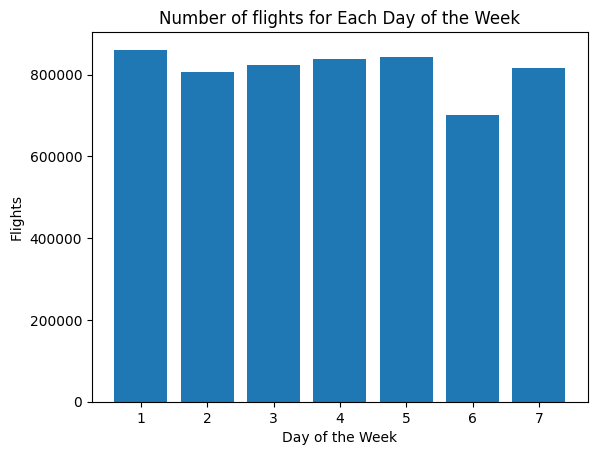

In [ ]:
# PLOTTARE CONTEGGIO DI VOLI AEREI PER GIORNO DELLA SETTIMANA

# Calcola il conteggio delle istanze per ciascun giorno della settimana
count_by_day = df.groupBy("DayOfWeek").count().orderBy("DayOfWeek")

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df = count_by_day.toPandas()

# Plotta il grafico a barre
plt.bar(pandas_df["DayOfWeek"], pandas_df["count"])
plt.xlabel("Day of the Week")
plt.ylabel("Flights")
plt.title("Number of flights for Each Day of the Week")
plt.show()

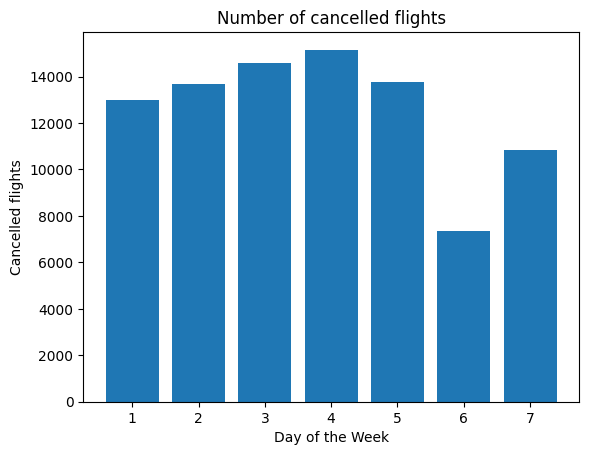

In [ ]:
# Filtra le righe dove "boolean_column" è uguale a 1
filtered_df = df.filter(col("Cancelled") == 1)

# Calcola il conteggio delle istanze per ciascun giorno della settimana
count_by_day = filtered_df.groupBy("DayOfWeek").count().orderBy("DayOfWeek")

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df = count_by_day.toPandas()

# Plotta il grafico a barre
plt.bar(pandas_df["DayOfWeek"], pandas_df["count"])
plt.xlabel("Day of the Week")
plt.ylabel("Cancelled flights")
plt.title("Number of cancelled flights")
plt.show()

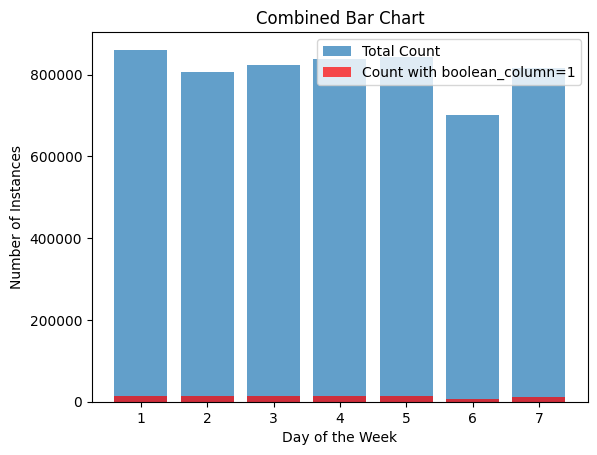

In [ ]:


# Calcola il conteggio delle istanze per ciascun giorno della settimana
count_by_day_total = df.groupBy("DayOfWeek").count().orderBy("DayOfWeek")

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df_total = count_by_day_total.toPandas()

# Filtra le righe dove "boolean_column" è uguale a 1
filtered_df = df.filter(col("Cancelled") == 1)

# Calcola il conteggio delle istanze per ciascun giorno della settimana in base a "boolean_column"
count_by_day_boolean = filtered_df.groupBy("DayOfWeek").count().orderBy("DayOfWeek")

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df_boolean = count_by_day_boolean.toPandas()

# Plotta il grafico a barre combinato
fig, ax = plt.subplots()

# Barre per il conteggio totale
ax.bar(pandas_df_total["DayOfWeek"], pandas_df_total["count"], label="Total Count", alpha=0.7)

# Barre per il conteggio con "boolean_column" uguale a 1
ax.bar(pandas_df_boolean["DayOfWeek"], pandas_df_boolean["count"], label="Count with boolean_column=1", color='red', alpha=0.7)

# Personalizza l'aspetto del grafico
plt.xlabel("Day of the Week")
plt.ylabel("Number of Instances")
plt.title("Combined Bar Chart")
plt.legend()

# Mostra il grafico
plt.show()




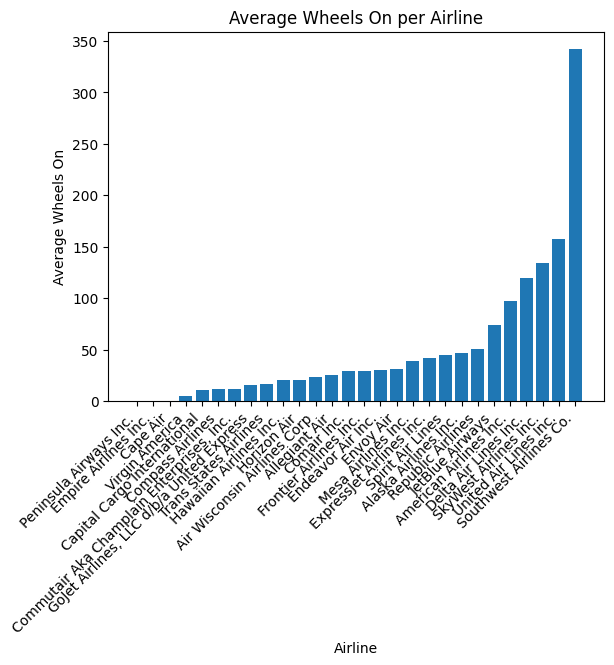

In [ ]:
# TEMPO MEDIO DI WHEELS ON RAGGRUPPATO PER AIRLINE E MESSO IN ORDINE CRESCENTE

# Calcola la somma di "Wheels_On" per ogni compagnia aerea
total_wheels_on = df.groupBy("Airline").agg({"WheelsOn": "sum"})

# Calcola la media di "Wheels_On" per ogni compagnia aerea
total_wheels_on = total_wheels_on.withColumnRenamed("sum(WheelsOn)", "total_Wheels_On")
average_wheels_on = total_wheels_on.withColumn("avg_Wheels_On", col("total_Wheels_On") / df.count())

# Ordina il DataFrame per la variabile "avg_Wheels_On" in ordine crescente
average_wheels_on = average_wheels_on.orderBy("avg_Wheels_On")

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df = average_wheels_on.toPandas()

# Plotta il grafico a barre
plt.bar(pandas_df["Airline"], pandas_df["avg_Wheels_On"])
plt.xlabel("Airline")
plt.ylabel("Average Wheels On")
plt.title("Average Wheels On per Airline")
plt.xticks(rotation=45, ha="right")
plt.show()


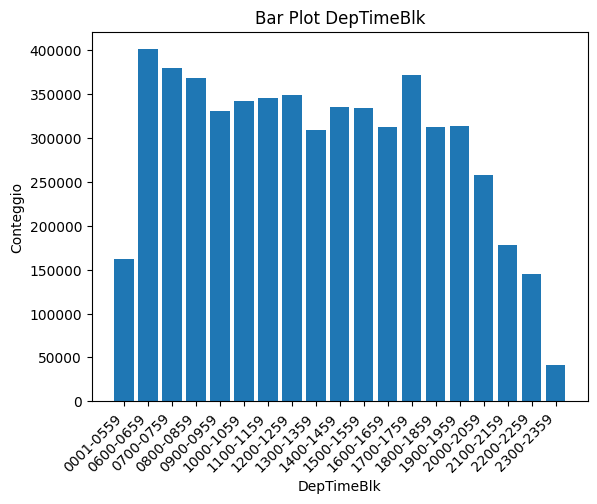

In [ ]:
# COPIA EXAMPLE ALTRO NOTEBOOK

conteggio_per_categoria = cleaned_df.groupBy("DepTimeBlk").count().toPandas()
conteggio_per_categoria = conteggio_per_categoria.sort_values(by='DepTimeBlk')

# Crea il bar plot utilizzando Matplotlib
plt.bar(conteggio_per_categoria['DepTimeBlk'], conteggio_per_categoria['count'])
plt.xlabel('DepTimeBlk')
plt.ylabel('Conteggio')
plt.title('Bar Plot DepTimeBlk')
plt.xticks(rotation=45, ha="right")
plt.show()